<a href="https://colab.research.google.com/github/123453ANSH/fMRIAnalysis/blob/main/Neurotech_fMRI_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neurotech NMEP Group 5 fMRI Project: 

*Hypothesis/Research Question:*

**Parts of study trying to reproduce:**

**- Reproduce Figure 4 (demonstrating how neural correlates of integrative processing negatively affected by individual E-device usage)**

**- Reproduce Table 2 (parts of table that demonstrate correlation between neuronal activation and E-device Usage); Neural Correlates of Sub-optimal KS Processing in Individuals with higher E-device Usage; Neural correlates of Suboptimal KS Processing in Individuals with lower E-devices Usage**

**- Reproduce Figure 5, sections E & F (subsets of image that demonstrate neuronal activation during low and high e-device usage)**

**With reproduced images and data, also provide written explanation showing significance of results for reading and E-devices**

*Note -> if during any point in reproduction, feel other images/statistics needed to support hypothesis, include*


**Preprocessing steps**

Note -> was going to follow methods section of paper, but the software & techniques they use we felt would be too complex for us to feasibly do; therefore, we are attempting to use the preprocessing method taught to us through NMEP; if this preprocessing method does not yield the same processed data, we will look into other preprocessing methods to use

Steps: 

1) transposing data 

2) masking data 

2) data visualization

Journal Article - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6681173/

fMRI dataset - https://openneuro.org/datasets/ds002247/versions/1.0.0/download

Actual journal preprocessing steps (use later if need to go down this route): 

1) Preprocessing data via -> http://www.fil.ion.ucl.ac.uk/spm

Loading dataset:

In [1]:
import nibabel
import os
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls '/content/gdrive/My Drive/Neurotech fMRI Project Group/sub-01-fmap-sub-01_acq-multiband_dir-AP_epi.nii'

'/content/gdrive/My Drive/Neurotech fMRI Project Group/sub-01-fmap-sub-01_acq-multiband_dir-AP_epi.nii'


In [4]:
file_path = '/content/gdrive/My Drive/Neurotech fMRI Project Group/sub-01-fmap-sub-01_acq-multiband_dir-AP_epi.nii'

--

In [6]:
image_path = os.path.join(file_path) 

In [7]:
fMRI_random_img = nibabel.load(image_path)
fMRI_random_img

Image shape:

In [10]:
"""Sanity check of data"""
fMRI_random_img.shape

(80, 80, 30, 4)

Note to self

1) 

(X, Y, Z, T)

Z corresponds to horizontal slices 

2) 

.get_fdata() -> gets data



In [15]:
practice_data = fMRI_random_img.get_fdata()
practice_data

memmap([[[[ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          ...,
          [ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.]],

         [[ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          ...,
          [ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.]],

         [[ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          ...,
          [ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.]],

         ...,

         [[ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          ...,
          [ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.]],

         [[ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          ...,
          [ 0.,  0.,  0.,  0.],
      

In [16]:
print('data type: ', practice_data.dtype)
print('data shape: ', practice_data.shape)

data type:  float64
data shape:  (80, 80, 30, 4)


In [20]:
"""Check to see if img data is in local memory/cache"""

fMRI_random_img.in_memory

True

Below is the image header for file, or a summary of all of the image information:

In [21]:
print(fMRI_random_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b'cmrr_mbep2d_se'
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 48
dim             : [ 4 80 80 30  4  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.000000e+00  3.000000e+00  3.000000e+00  4.000000e+00  3.000000e+00
  1.000000e+00  5.799926e-01  5.896988e+04]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 29
slice_code      : alternating increasing 2
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 46.399406
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : b'TE=51.20000076;sec=58969.8800;phaseDir=+;dwell=0.580'
aux_file        : b'SENSE1'
qform_code      : scanner
sform_code      : scanner
quate

Preprocessing step #1: 

transpose data array demensions (X, Y, Z, T) -> (T, Z, Y, X)

In [25]:
"""Visualize transposed data"""
transposed_data = practice_data.T
transposed_data

memmap([[[[ 0., 14., 12., ..., 21., 18., 17.],
          [ 0., 14., 11., ..., 20., 21., 15.],
          [ 0., 14., 20., ..., 34., 31., 20.],
          ...,
          [ 0., 14., 20., ..., 10., 22., 13.],
          [ 0., 16., 14., ..., 32., 29., 20.],
          [ 0., 10., 11., ..., 25., 19., 19.]],

         [[ 0., 12., 12., ..., 23., 20., 18.],
          [ 0., 12., 13., ..., 19., 25., 21.],
          [ 0., 20., 18., ..., 26., 33., 26.],
          ...,
          [ 0., 11., 20., ..., 35., 35., 24.],
          [ 0., 12.,  8., ..., 29., 22.,  4.],
          [ 0.,  6., 19., ..., 21., 18., 13.]],

         [[ 0., 17., 14., ..., 25., 17., 23.],
          [ 0., 17., 16., ..., 21., 15., 22.],
          [ 0., 21., 10., ..., 27., 25., 15.],
          ...,
          [ 0., 19., 12., ..., 24., 24., 23.],
          [ 0., 11., 18., ..., 22., 28., 19.],
          [ 0.,  9., 13., ..., 21.,  9., 17.]],

         ...,

         [[ 0., 11., 13., ..., 18., 20., 16.],
          [ 0.,  9., 16., ..., 11., 20., 

In [26]:

print('data type: ', transposed_data.dtype)
print('data shape: ', transposed_data.shape)

data type:  float64
data shape:  (4, 30, 80, 80)


# **4D fMRI Data Manipulation**

Ok so now we have a 4-dimension array of fMRI data. Remember that this is essentially a 4D scan containing volumetric/voxel data over a series of time points.

**Indexing**

Using the transposed data, we can isolate the voxel time series data by looking at a single voxel, say (1, 1, 1) over all of the time points. Remember that time is the first dimension:

In [27]:
first_time_series = transposed_data[:, 1, 1, 1]
print(first_time_series.shape)
first_time_series

(4,)


array([12.,  4.,  1.,  4.])

**Mean**

When working with 4D fMRI data arrays, it can be useful to take a descriptive statistic across time series values especially for pre-processing. For example, taking the mean of the volume data over time gives a descriptive statistic for the whole brain representing the 3D mean volume.

To take the mean over **time** (which is the first dimension) we just have to specify the axis:

In [17]:
data_mean = transposed_data.mean(axis=0) #axis=0 specifies axis as time, the first (0) dimension
print(data_mean.shape)
data_mean

(30, 80, 80)


array([[[ 0.  ,  6.  ,  7.75, ..., 11.25,  8.75,  6.75],
        [ 0.  ,  5.5 ,  7.  , ..., 11.25,  9.5 ,  6.  ],
        [ 0.  ,  4.5 ,  9.25, ..., 15.  , 15.75,  9.  ],
        ...,
        [ 0.  ,  6.25,  9.  , ..., 12.5 , 11.75,  8.5 ],
        [ 0.  ,  5.5 ,  9.  , ..., 12.75, 13.25, 10.  ],
        [ 0.  ,  4.75,  4.75, ..., 10.  ,  9.75,  7.25]],

       [[ 0.  ,  5.25,  5.  , ..., 11.  ,  9.  ,  9.5 ],
        [ 0.  ,  5.25,  5.25, ..., 10.  , 11.  , 12.  ],
        [ 0.  ,  8.5 ,  9.75, ..., 16.75, 14.75, 12.75],
        ...,
        [ 0.  ,  5.25,  8.  , ..., 15.5 , 15.5 , 10.  ],
        [ 0.  ,  5.5 ,  4.25, ..., 12.25,  8.  ,  3.75],
        [ 0.  ,  2.25,  7.75, ..., 15.75, 12.  ,  6.5 ]],

       [[ 0.  ,  6.25,  6.5 , ..., 10.75,  9.  ,  9.  ],
        [ 0.  ,  6.  ,  6.5 , ..., 10.5 ,  9.75,  9.  ],
        [ 0.  ,  7.5 ,  7.  , ..., 14.  , 15.5 ,  7.5 ],
        ...,
        [ 0.  ,  7.75,  7.5 , ..., 15.75, 11.25, 12.75],
        [ 0.  ,  5.25,  7.25, ..., 12.  , 13.

## **Masking**

The last important technique for subsetting data from an array is **masking**. 

How do we mask an array? Masking involves creating a **boolean** array (True/False) version of the data array where values corresponding to **True** masks are kept and values corresponding to **False** masks are not. The masking array must be the same size as the data array so that the indices match up. 

Masks can also be created using **binary operators** (>, <, ==, !=). This helps with larger arrays where typing out all of the True/False values can get really tedious. It also allows us to analyze or filter the values of the array by some condition.

**What's the point of masking?**

Masking allows for selecting certain indices, like indexing, which **reduces dimensionality**: masked arrays have to be returned in a single dimension because after masking, the resulting array elements are no longer necessarily  in a form that fits exactly into the original multiple dimensions. 

We can use masking in fMRI data as a **pre-processing step**, using it to get rid of unwanted voxels or to get just a subset of the voxels we are interested in (for example just data from a certain part of the brain).

To figure out what data we are actually interested in, let's plot a histogram of all of the data.

Text(0, 0.5, 'TRs (count)')

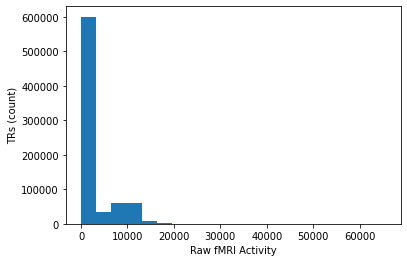

In [18]:
_ = plt.hist(transposed_data.flatten(), bins=20)
plt.xlabel('Raw fMRI Activity')
plt.ylabel('TRs (count)')

From the histogram, we see that there is a large peak near 0 and another smaller bump around 1000. The values close to 0 are actually from outside of the brain, where the low signal values are caused by external things like air. So we aren't actually interested in the data there.

So how can we extract the data from only the region of the scan that contains brain data? **Masking!**

If we can determine a bottom threshold for the data we are interested in, we can filter out the non-brain data using a boolean mask! Let's take a closer look at a more specific range of the histogram:

Text(0, 0.5, 'TRs (count)')

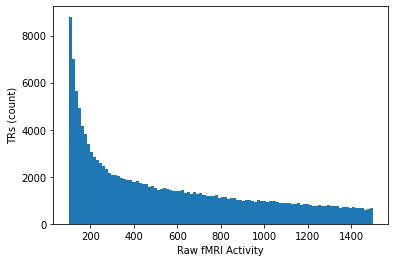

In [19]:
_ = plt.hist(transposed_data.flatten(), bins=100, range=(100, 1500))
plt.xlabel('Raw fMRI Activity')
plt.ylabel('TRs (count)')

Ok so by setting the range as 100 to 1500, we cut off most of the low signal range data and we can see the main brain data bump better. It looks like the plot as a second peak at around 700 to 1300, so we can set 700 as our low threshold.

In [20]:
threshold = 700

Next, we have to determine which volume to threshold- this is where the **mean volume** comes in. If we picked an individual volume, it could have noise fluctuations that bias its value. However, the volume is resistant to fluctuations. So, let's mask the mean 3D volume array `data_mean` from before so that only voxels whose mean activity is above the threshold are kept.

In [21]:
masked_data = data_mean > threshold
print(f'There are {masked_data.sum()} voxel activity values above the threshold.')

There are 66985 voxel activity values above the threshold.


Now let's visualize the mask! We'll use a function from the cogneuro class to create an interactive plot that shows one axial slice of the 3D mask at a time. Use the sliding bars to move through the brain slices!

In [22]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
def plotMask(i):
    plt.figure(figsize=(9,9))
    plt.imshow(masked_data[i,:,:], cmap="gray", vmin=0, vmax=1)
    plt.axis('off')
    
num_axial_slices = masked_data.shape[0]
_ = interact(plotMask, i=widgets.IntSlider(min=0,max=num_axial_slices-1,step=1,value=num_axial_slices/2))

interactive(children=(IntSlider(value=15, description='i', max=29), Output()), _dom_classes=('widget-interact'…

We can also use a similar function to plot the data directly without a filtering mask:

In [23]:
def plotData(i):
    plt.figure(figsize=(9,9))
    plt.imshow(data_mean[i,:,:], cmap="gray", vmin=0, vmax=2500)
    plt.axis('off')
    
_ = interact(plotData, i=widgets.IntSlider(min=0,max=num_axial_slices-1,step=1,value=num_axial_slices/2))

interactive(children=(IntSlider(value=15, description='i', max=29), Output()), _dom_classes=('widget-interact'…

Good, the plots look pretty similar! 

#**Summary**

So, in this lesson we loaded an actual fMRI experimental dataset and reviewed some basic data attribute info from lesson 1. You learned some basic 4D array data manipulation useful for fMRI data including averaging, indexing, and masking. Masking helps filter out unwanted voxels (like non-brain data) or allows us to focus in on specific brain data in a desired range of brain activity. Lastly, we plotted the masked data and the mean volume data in interactive plots to finally take a peak into the visualizable fMRI data!

'Note to self -> idrg this stuff in depth (to point where could reproduce), but I need to! \n\nOnce get to point where need to use these technics, learn in depth'